# Basic EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Basic
import numpy as np
import pandas as pd
import collections

#Plotting
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#Regular modeling
import folium
import matplotlib
import statsmodels.api as sm
from itertools import groupby
from operator import itemgetter
from math import sqrt

#Extended modeling
import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn import metrics, mixture, cluster, datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF

from mlxtend.preprocessing import minmax_scaling

import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
import pandas as pd

polls_24 = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/presidential_general_averages_2024-09-12_uncorrected.csv')
polls_20 = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/presidential_poll_averages_2020.csv')
polls_until_16 = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/pres_pollaverages_1968-2016.csv')

In [ ]:

polls_24

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo
0,Joseph R. Biden Jr.,2020-11-03,37.82732,Alabama,2020,NaN,NaN,NaN,NaN
1,Donald Trump,2020-11-03,57.36126,Alabama,2020,NaN,NaN,NaN,NaN
2,Joseph R. Biden Jr.,2020-11-02,37.82732,Alabama,2020,NaN,NaN,NaN,NaN
3,Donald Trump,2020-11-02,57.36126,Alabama,2020,NaN,NaN,NaN,NaN
4,Joseph R. Biden Jr.,2020-11-01,38.07011,Alabama,2020,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
27096,Kennedy,2024-03-02,NaN,Wisconsin,2024,IND,10.28615,12.852725,7.514286
27097,Biden,2024-03-02,NaN,Wisconsin,2024,DEM,38.73255,41.180613,36.214855
27098,Trump,2024-03-01,NaN,Wisconsin,2024,REP,41.58205,43.986072,39.224702
27099,Kennedy,2024-03-01,NaN,Wisconsin,2024,IND,10.30900,13.044215,7.668578


In [ ]:
polls_24 = polls_24[polls_24['cycle'] == 2024]

polls_24['date'] = pd.to_datetime(polls_24['date'], format='%Y-%m-%d')

polls_24['date'].unique()

<DatetimeArray>
['2024-09-12 00:00:00', '2024-09-11 00:00:00', '2024-09-10 00:00:00',
 '2024-09-09 00:00:00', '2024-09-08 00:00:00', '2024-09-07 00:00:00',
 '2024-09-06 00:00:00', '2024-09-05 00:00:00', '2024-09-04 00:00:00',
 '2024-09-03 00:00:00',
 ...
 '2024-03-10 00:00:00', '2024-03-09 00:00:00', '2024-03-08 00:00:00',
 '2024-03-07 00:00:00', '2024-03-06 00:00:00', '2024-03-05 00:00:00',
 '2024-03-04 00:00:00', '2024-03-03 00:00:00', '2024-03-02 00:00:00',
 '2024-03-01 00:00:00']
Length: 194, dtype: datetime64[ns]

In [ ]:
#datafile = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_state.csv')
state_codes = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')
datafile = polls_24.merge(state_codes, left_on='state', right_on='usa_state')
datafile['candidate'].unique()

array(['Trump', 'Harris', 'Kennedy', 'Biden'], dtype=object)

In [ ]:
datafile = datafile[datafile['date'] == '2024-09-12']
datafile

,candidate,date,pct_trend_adjusted,state,cycle,party,pct_estimate,hi,lo,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Trump,2024-09-12,NaN,Arizona,2024,REP,46.15125,47.713017,44.562177,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
1,Harris,2024-09-12,NaN,Arizona,2024,DEM,45.55990,47.205613,43.831088,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
109,Trump,2024-09-12,NaN,California,2024,REP,34.41795,36.577497,32.132117,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
110,Harris,2024-09-12,NaN,California,2024,DEM,58.30125,60.709122,55.941760,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
129,Trump,2024-09-12,NaN,Florida,2024,REP,48.28725,49.890107,46.673500,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
130,Harris,2024-09-12,NaN,Florida,2024,DEM,44.19405,45.909737,42.466485,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
202,Trump,2024-09-12,NaN,Georgia,2024,REP,46.48275,48.041625,44.784055,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
203,Harris,2024-09-12,NaN,Georgia,2024,DEM,45.96245,47.743640,44.324088,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
317,Trump,2024-09-12,NaN,Michigan,2024,REP,44.95310,46.389913,43.509180,BH,25.930414,50.637772,Bahrain,MI,44.314844,-85.602364,Michigan
318,Harris,2024-09-12,NaN,Michigan,2024,DEM,46.65590,48.167030,45.097683,BH,25.930414,50.637772,Bahrain,MI,44.314844,-85.602364,Michigan


In [ ]:


# Pivot the data to create separate columns for each party's pct_estimate
modified_df = datafile.pivot_table(
    index="state",
    columns="party",
    values="pct_estimate",
    aggfunc="first"
).reset_index()

# Rename columns for clarity
modified_df.columns.name = None  # Remove the MultiIndex from columns
modified_df = modified_df.rename(columns={
    "REP": "REP_pct_estimate",
    "DEM": "DEM_pct_estimate",
    'IND' : 'IND_pct_estimate'
})

modified_df

,state,DEM_pct_estimate,REP_pct_estimate
0,Arizona,45.55990,46.15125
1,California,58.30125,34.41795
2,Florida,44.19405,48.28725
3,Georgia,45.96245,46.48275
4,Michigan,46.65590,44.95310
5,Minnesota,48.99625,41.85890
6,Nevada,45.75940,45.45930
7,New Hampshire,50.14210,43.50810
8,North Carolina,46.25900,45.96250
9,Ohio,41.59105,50.43690


In [ ]:
#datafile = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_state.csv')
state_codes = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')
modified_datafile = modified_df.merge(state_codes, left_on='state', right_on='usa_state')
modified_datafile

,state,DEM_pct_estimate,REP_pct_estimate,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Arizona,45.55990,46.15125,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
1,California,58.30125,34.41795,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
2,Florida,44.19405,48.28725,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
3,Georgia,45.96245,46.48275,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
4,Michigan,46.65590,44.95310,BH,25.930414,50.637772,Bahrain,MI,44.314844,-85.602364,Michigan
5,Minnesota,48.99625,41.85890,BI,-3.373056,29.918886,Burundi,MN,46.729553,-94.685900,Minnesota
6,Nevada,45.75940,45.45930,BY,53.709807,27.953389,Belarus,NV,38.802610,-116.419389,Nevada
7,New Hampshire,50.14210,43.50810,BT,27.514162,90.433601,Bhutan,NH,43.193852,-71.572395,New Hampshire
8,North Carolina,46.25900,45.96250,BO,-16.290154,-63.588653,Bolivia,NC,35.759573,-79.019300,North Carolina
9,Ohio,41.59105,50.43690,CA,56.130366,-106.346771,Canada,OH,40.417287,-82.907123,Ohio


## Visualization

In [ ]:
fig = px.choropleth(modified_datafile,
                    locations="usa_state_code",
                    color = "DEM_pct_estimate",
                    locationmode = 'USA-states',
                    hover_name="state",
                    range_color=[25,75],
                    color_continuous_scale = 'RdBu',#blues
                    scope="usa",
                    title='2024 USA Election: Percent of Population Voting for the Democratic Party')
fig.show()


2020 Vote Margin 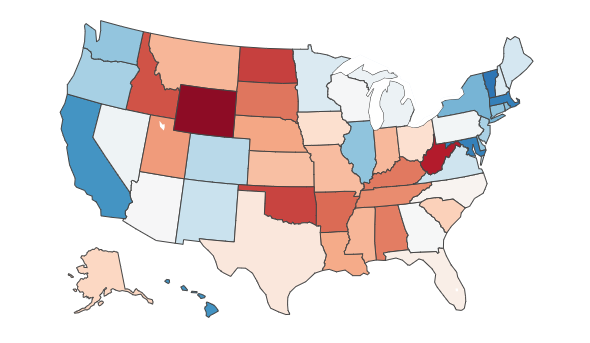

Arizona
Georgia
Michigan
Nevada
North Carolina
Pennsylvania
Wisconsin

In [ ]:
df_census = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/acs2017_county_data.csv')
df_census = df_census.rename(columns={"State": "state","County": "county"})
df_census.columns

Index(['CountyId', 'state', 'county', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [ ]:
vars_to_merge = [x for x in df_census.columns if x not in ['CountyId', 'state','county']]

df_census_agg = pd.DataFrame(df_census.groupby(['state', 'county'])[vars_to_merge].sum())
df_census_agg.head(5)


TotalPop    Men   Women  Hispanic  White  Black  \
state   county                                                            
Alabama Autauga County     55036  26899   28137       2.7   75.4   18.9   
        Baldwin County    203360  99527  103833       4.4   83.1    9.5   
        Barbour County     26201  13976   12225       4.2   45.7   47.8   
        Bibb County        22580  12251   10329       2.4   74.6   22.0   
        Blount County      57667  28490   29177       9.0   87.4    1.5   

                        Native  Asian  Pacific  VotingAgeCitizen  ...  Walk  \
state   county                                                    ...         
Alabama Autauga County     0.3    0.9      0.0             41016  ...   0.6   
        Baldwin County     0.8    0.7      0.0            155376  ...   0.8   
        Barbour County     0.2    0.6      0.0             20269  ...   2.2   
        Bibb County        0.4    0.0      0.0             17662  ...   0.3   
        Blount County      0.3    0.1      0.0             42513  ...   0.4   

                        OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                           
Alabama Autauga County          1.3         2.5         25.8     24112   
        Baldwin County          1.1         5.6         27.0     89527   
        Barbour County          1.7         1.3         23.4      8878   
        Bibb County             1.7         1.5         30.0      8171   
        Blount County           0.4         2.1         35.0     21380   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 34 columns]

In [ ]:
state_averages = df_census_agg.groupby("state").mean(numeric_only=True)
state_averages.head(5)

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
state,,,,,,,,,,,,,,,,,,,,,
Alabama,72399.567164,35086.656716,37312.910448,3.298507,65.168657,28.673134,0.607463,0.711940,0.017910,54506.179104,...,1.204478,1.140299,2.528358,26.189552,30679.238806,78.171642,16.049254,5.573134,0.210448,9.023881
Alaska,25467.758621,13321.344828,12146.413793,5.093103,48.420690,1.179310,31.627586,5.982759,0.544828,18294.931034,...,24.696552,9.741379,5.455172,11.200000,12208.448276,59.631034,32.834483,7.220690,0.296552,9.655172
Arizona,453996.400000,225670.333333,228326.066667,30.886667,50.826667,1.813333,13.233333,1.293333,0.126667,312678.466667,...,3.320000,2.186667,5.033333,21.700000,196926.066667,72.000000,21.846667,5.953333,0.180000,9.766667
Arkansas,39705.920000,19488.680000,20217.240000,5.090667,75.634667,16.132000,0.540000,0.692000,0.077333,29118.600000,...,1.970667,1.361333,3.250667,23.013333,17020.480000,75.233333,17.185333,7.376000,0.202667,7.292000
California,672118.051724,333906.534483,338211.517241,30.070690,54.762069,2.944828,1.650000,7.070690,0.291379,430519.120690,...,3.336207,2.603448,6.668966,25.527586,310239.913793,71.148276,18.881034,9.567241,0.405172,8.265517


In [ ]:
df = pd.DataFrame(state_averages.groupby(['state'])[vars_to_merge].sum())
#modified_df = modified_df.set_index('state')
df_final = pd.merge(modified_df, df, on=['state'],how='left')

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")


The number of missing entries before cleaning: 0.0 %


In [ ]:
df_final

,state,DEM_pct_estimate,REP_pct_estimate,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Arizona,45.55990,46.15125,453996.400000,225670.333333,228326.066667,30.886667,50.826667,1.813333,13.233333,...,3.320000,2.186667,5.033333,21.700000,196926.066667,72.000000,21.846667,5.953333,0.180000,9.766667
1,California,58.30125,34.41795,672118.051724,333906.534483,338211.517241,30.070690,54.762069,2.944828,1.650000,...,3.336207,2.603448,6.668966,25.527586,310239.913793,71.148276,18.881034,9.567241,0.405172,8.265517
2,Florida,44.19405,48.28725,302663.388060,147975.537313,154687.850746,13.725373,68.120896,14.201493,0.395522,...,1.465672,2.343284,5.008955,26.391045,134605.522388,76.195522,17.340299,6.298507,0.156716,7.765672
3,Georgia,45.96245,46.48275,64161.226415,31250.861635,32910.364780,6.233333,62.564151,28.144654,0.189937,...,1.510692,1.559119,3.611321,25.910063,28970.622642,75.218868,18.516352,6.116352,0.154088,8.053459
4,Michigan,46.65590,44.95310,119585.156627,58802.156627,60783.000000,3.460241,88.098795,3.874699,1.262651,...,2.867470,1.456627,4.408434,23.108434,54516.554217,80.475904,12.802410,6.465060,0.268675,7.620482
5,Minnesota,48.99625,41.85890,63111.793103,31400.356322,31711.436782,4.275862,88.937931,1.629885,1.935632,...,3.549425,1.281609,6.078161,21.386207,33380.494253,78.522989,13.156322,8.075862,0.240230,3.954023
6,Nevada,45.75940,45.45930,169866.176471,85299.470588,84566.705882,17.317647,72.294118,2.188235,3.858824,...,5.929412,1.458824,4.617647,21.735294,78903.411765,70.500000,22.264706,7.064706,0.164706,7.394118
7,New Hampshire,50.14210,43.50810,133184.800000,65913.100000,67271.700000,2.320000,92.950000,1.020000,0.190000,...,3.240000,1.570000,5.960000,25.400000,71342.400000,77.520000,14.660000,7.710000,0.110000,4.540000
8,North Carolina,46.25900,45.96250,100525.640000,48953.680000,51571.960000,7.092000,68.111000,20.163000,1.549000,...,1.754000,1.321000,3.935000,25.188000,45710.200000,76.263000,16.854000,6.697000,0.187000,7.965000
9,Ohio,41.59105,50.43690,131929.045455,64614.556818,67314.488636,2.615909,90.285227,4.080682,0.146591,...,2.271591,1.184091,3.563636,24.475000,62365.681818,81.913636,12.367045,5.523864,0.201136,6.084091


In [ ]:
import pandas as pd

# Assuming `df` is your DataFrame and it contains the required columns
# Replace 'pct_estimate' with the actual column name of the percentage estimate of votes for the candidate or party
df_final['VoteTurnout'] = (df_final['DEM_pct_estimate'] / 100) * df_final['VotingAgeCitizen']



In [ ]:
df_final

,state,DEM_pct_estimate,REP_pct_estimate,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,VoteTurnout
0,Arizona,45.55990,46.15125,453996.400000,225670.333333,228326.066667,30.886667,50.826667,1.813333,13.233333,...,2.186667,5.033333,21.700000,196926.066667,72.000000,21.846667,5.953333,0.180000,9.766667,142455.996735
1,California,58.30125,34.41795,672118.051724,333906.534483,338211.517241,30.070690,54.762069,2.944828,1.650000,...,2.603448,6.668966,25.527586,310239.913793,71.148276,18.881034,9.567241,0.405172,8.265517,250998.028851
2,Florida,44.19405,48.28725,302663.388060,147975.537313,154687.850746,13.725373,68.120896,14.201493,0.395522,...,2.343284,5.008955,26.391045,134605.522388,76.195522,17.340299,6.298507,0.156716,7.765672,95389.196075
3,Georgia,45.96245,46.48275,64161.226415,31250.861635,32910.364780,6.233333,62.564151,28.144654,0.189937,...,1.559119,3.611321,25.910063,28970.622642,75.218868,18.516352,6.116352,0.154088,8.053459,20685.915171
4,Michigan,46.65590,44.95310,119585.156627,58802.156627,60783.000000,3.460241,88.098795,3.874699,1.262651,...,1.456627,4.408434,23.108434,54516.554217,80.475904,12.802410,6.465060,0.268675,7.620482,41795.153429
5,Minnesota,48.99625,41.85890,63111.793103,31400.356322,31711.436782,4.275862,88.937931,1.629885,1.935632,...,1.281609,6.078161,21.386207,33380.494253,78.522989,13.156322,8.075862,0.240230,3.954023,22587.361358
6,Nevada,45.75940,45.45930,169866.176471,85299.470588,84566.705882,17.317647,72.294118,2.188235,3.858824,...,1.458824,4.617647,21.735294,78903.411765,70.500000,22.264706,7.064706,0.164706,7.394118,52319.413749
7,New Hampshire,50.14210,43.50810,133184.800000,65913.100000,67271.700000,2.320000,92.950000,1.020000,0.190000,...,1.570000,5.960000,25.400000,71342.400000,77.520000,14.660000,7.710000,0.110000,4.540000,51881.278738
8,North Carolina,46.25900,45.96250,100525.640000,48953.680000,51571.960000,7.092000,68.111000,20.163000,1.549000,...,1.321000,3.935000,25.188000,45710.200000,76.263000,16.854000,6.697000,0.187000,7.965000,33814.246539
9,Ohio,41.59105,50.43690,131929.045455,64614.556818,67314.488636,2.615909,90.285227,4.080682,0.146591,...,1.184091,3.563636,24.475000,62365.681818,81.913636,12.367045,5.523864,0.201136,6.084091,41409.717748


In [ ]:
#datafile = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/president_state.csv')
state_codes = pd.read_csv('/content/drive/MyDrive/ECE 225 - STATS & PROB/Dataset/world_country_and_usa_states_latitude_and_longitude_values.csv')
temp_datafile = df_final.merge(state_codes, left_on='state', right_on='usa_state')
temp_datafile

,state,DEM_pct_estimate,REP_pct_estimate,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Unemployment,VoteTurnout,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Arizona,45.55990,46.15125,453996.400000,225670.333333,228326.066667,30.886667,50.826667,1.813333,13.233333,...,9.766667,142455.996735,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
1,California,58.30125,34.41795,672118.051724,333906.534483,338211.517241,30.070690,54.762069,2.944828,1.650000,...,8.265517,250998.028851,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
2,Florida,44.19405,48.28725,302663.388060,147975.537313,154687.850746,13.725373,68.120896,14.201493,0.395522,...,7.765672,95389.196075,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Florida
3,Georgia,45.96245,46.48275,64161.226415,31250.861635,32910.364780,6.233333,62.564151,28.144654,0.189937,...,8.053459,20685.915171,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Georgia
4,Michigan,46.65590,44.95310,119585.156627,58802.156627,60783.000000,3.460241,88.098795,3.874699,1.262651,...,7.620482,41795.153429,BH,25.930414,50.637772,Bahrain,MI,44.314844,-85.602364,Michigan
5,Minnesota,48.99625,41.85890,63111.793103,31400.356322,31711.436782,4.275862,88.937931,1.629885,1.935632,...,3.954023,22587.361358,BI,-3.373056,29.918886,Burundi,MN,46.729553,-94.685900,Minnesota
6,Nevada,45.75940,45.45930,169866.176471,85299.470588,84566.705882,17.317647,72.294118,2.188235,3.858824,...,7.394118,52319.413749,BY,53.709807,27.953389,Belarus,NV,38.802610,-116.419389,Nevada
7,New Hampshire,50.14210,43.50810,133184.800000,65913.100000,67271.700000,2.320000,92.950000,1.020000,0.190000,...,4.540000,51881.278738,BT,27.514162,90.433601,Bhutan,NH,43.193852,-71.572395,New Hampshire
8,North Carolina,46.25900,45.96250,100525.640000,48953.680000,51571.960000,7.092000,68.111000,20.163000,1.549000,...,7.965000,33814.246539,BO,-16.290154,-63.588653,Bolivia,NC,35.759573,-79.019300,North Carolina
9,Ohio,41.59105,50.43690,131929.045455,64614.556818,67314.488636,2.615909,90.285227,4.080682,0.146591,...,6.084091,41409.717748,CA,56.130366,-106.346771,Canada,OH,40.417287,-82.907123,Ohio


In [ ]:
temp_datafile['usa_state'].unique()

array(['Arizona', 'California', 'Florida', 'Georgia', 'Michigan',
       'Minnesota', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio',
       'Pennsylvania', 'Texas', 'Wisconsin'], dtype=object)

In [ ]:
# Ensure kaleido is installed


import plotly.express as px

# Create the figure
fig = px.choropleth(
    temp_datafile,
    locations='usa_state_code',
    color="VoteTurnout",
    range_color=(0, 100000),
    locationmode='USA-states',
    scope="usa",
    title='USA Presidential Votes Counts'
)

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

#fig.write_image("usa_votes_map.jpg")  # Saves as JPG
fig.show()



## Statistical Test

T-Test (Men vs Women DEM Votes): T-Statistic: 0.00, P-value: 1.0000
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       REP_pct_estimate   No. Observations:                   13
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                     inf
Time:                        01:47:45   Log-Likelihood:            -7.0610e-14
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.2752   2.65e+14  -4.25e-14      1.000    -5.2e+14     5.2e+

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/disc

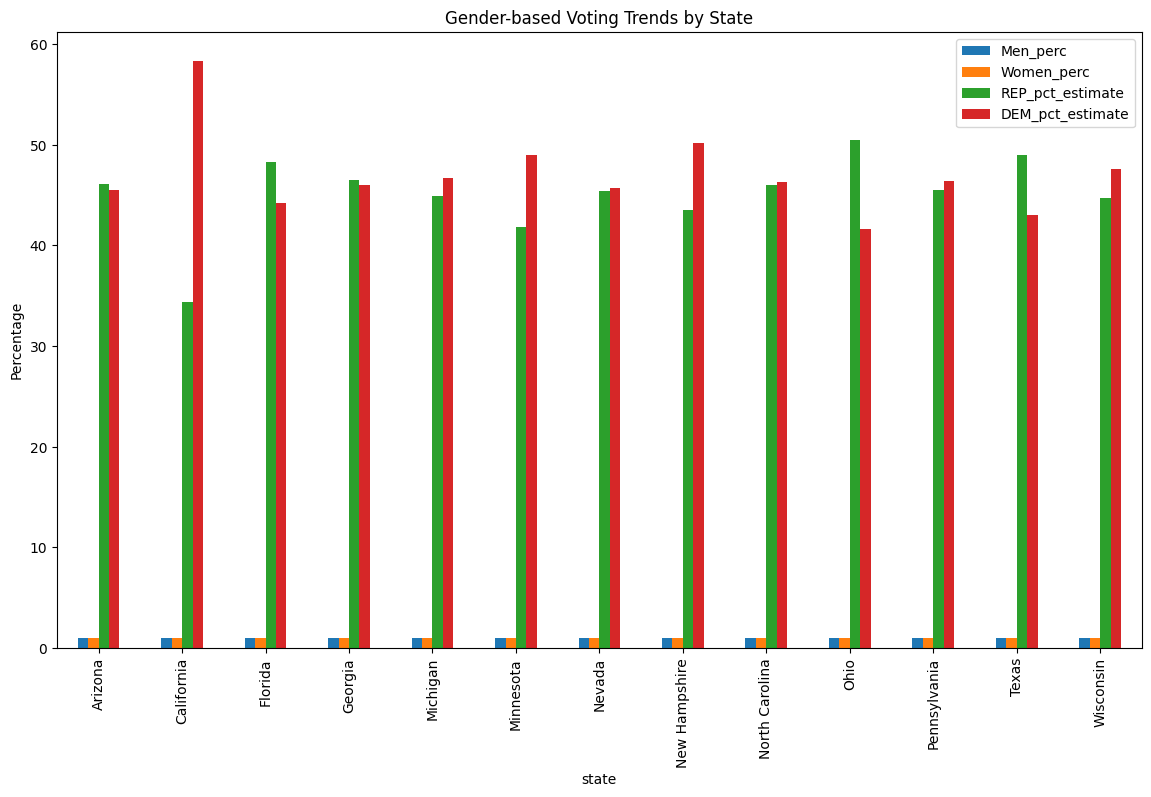

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Load the dataset
df = df_final

# Preprocessing
# Normalize population metrics
df['Men_perc'] = df['Men'] / df['TotalPop']
df['Women_perc'] = df['Women'] / df['TotalPop']

# Fill missing values with 0
df.fillna(0, inplace=True)

# Gender Gap Analysis
df['gender_gap_pres'] = df['REP_pct_estimate'] - df['DEM_pct_estimate']

# 1. Gender Analysis (T-Test)
# Compare Democratic voting percentages between predominantly male vs. female counties
t_stat, p_value_ttest = ttest_ind(
    df[df['Men_perc'] > 0.5]['DEM_pct_estimate'],
    df[df['Women_perc'] > 0.5]['DEM_pct_estimate']
)
print(f"T-Test (Men vs Women DEM Votes): T-Statistic: {t_stat:.2f}, P-value: {p_value_ttest:.4f}")

# 2. Logistic Regression
# Predict likelihood of voting Republican based on gender proportions
features = df[['Men_perc', 'Women_perc']]
target = (df['REP_pct_estimate'] > df['REP_pct_estimate']).astype(int)
features = sm.add_constant(features)
model = sm.Logit(target, features).fit()
print(model.summary())

# 3. Visualization
# Gender-based Voting Trends
gender_trend = df.groupby('state')[['Men_perc', 'Women_perc', 'REP_pct_estimate', 'DEM_pct_estimate']].mean()
gender_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Gender-based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


T-Test (High vs Low Hispanic REP Votes): T-Statistic: -0.86, P-value: 0.4065
Optimization terminated successfully.
         Current function value: 0.251694
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   13
Model:                          Logit   Df Residuals:                        9
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Dec 2024   Pseudo R-squ.:                  0.6222
Time:                        18:54:44   Log-Likelihood:                -3.2720
converged:                       True   LL-Null:                       -8.6616
Covariance Type:            nonrobust   LLR p-value:                   0.01298
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9211

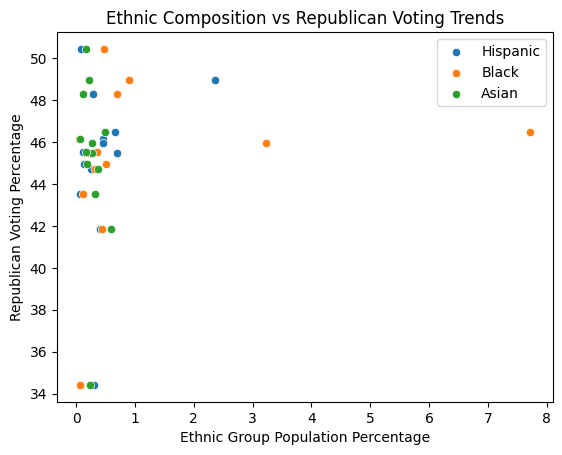

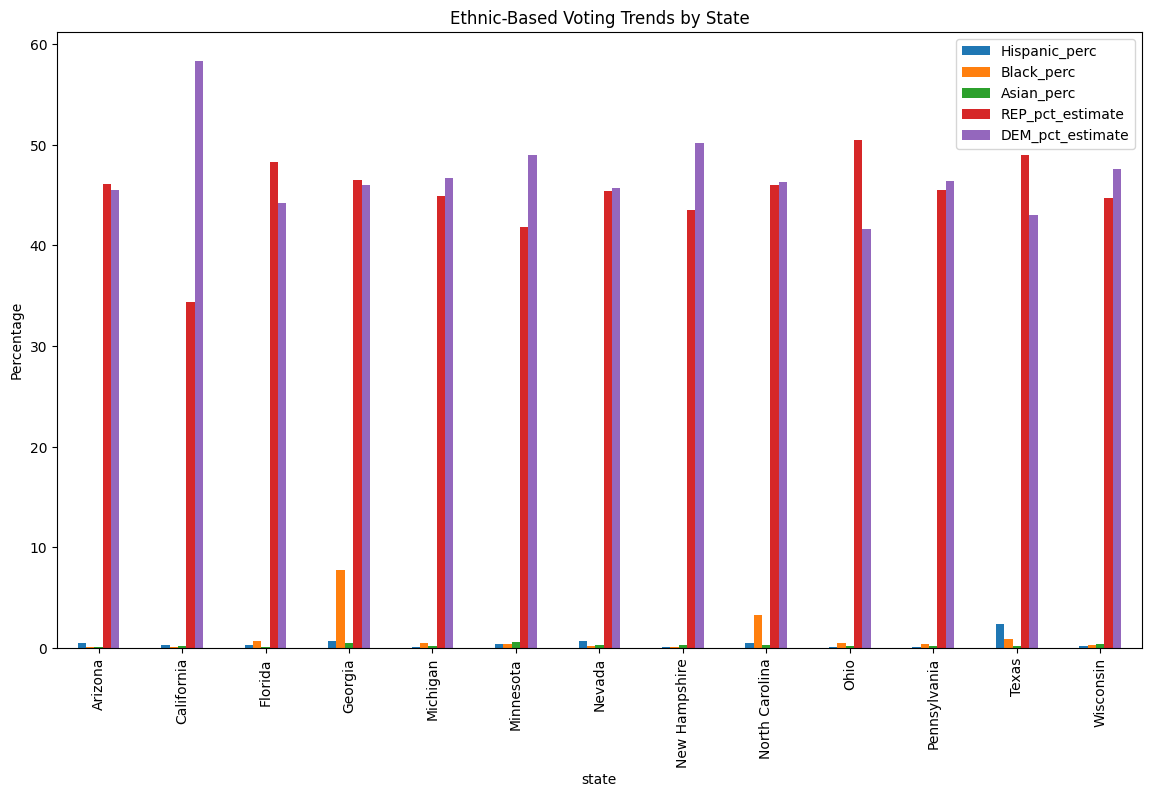

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Load the dataset
df = df_final

# Preprocessing
# Normalize population metrics
df['Men_perc'] = df['Men'] / df['TotalPop']
df['Women_perc'] = df['Women'] / df['TotalPop']
df['Hispanic_perc'] = df['Hispanic'] / df['TotalPop']
df['Black_perc'] = df['Black'] / df['TotalPop']
df['Asian_perc'] = df['Asian'] / df['TotalPop']

# Fill missing values with 0
df.fillna(0, inplace=True)

# Ethnic Analysis
# 1. T-Test: Compare Republican voting percentages for counties with high vs. low Hispanic population
threshold = 0.3  # Example threshold for significant Hispanic population
t_stat_hispanic, p_value_hispanic = ttest_ind(
    df[df['Hispanic_perc'] > threshold]['REP_pct_estimate'],
    df[df['Hispanic_perc'] <= threshold]['DEM_pct_estimate']
)
print(f"T-Test (High vs Low Hispanic REP Votes): T-Statistic: {t_stat_hispanic:.2f}, P-value: {p_value_hispanic:.4f}")

# 2. Logistic Regression: Predict Republican voting likelihood based on ethnicity proportions
features_ethnicity = df[['Hispanic_perc', 'Black_perc', 'Asian_perc']]
target_ethnicity = (df['REP_pct_estimate'] > df['DEM_pct_estimate']).astype(int)
features_ethnicity = sm.add_constant(features_ethnicity)
model_ethnicity = sm.Logit(target_ethnicity, features_ethnicity).fit()
print(model_ethnicity.summary())

# 3. Visualization: Ethnic Composition vs Voting Trends
sns.scatterplot(data=df, x='Hispanic_perc', y='REP_pct_estimate', label='Hispanic')
sns.scatterplot(data=df, x='Black_perc', y='REP_pct_estimate', label='Black')
sns.scatterplot(data=df, x='Asian_perc', y='REP_pct_estimate', label='Asian')
plt.title('Ethnic Composition vs Republican Voting Trends')
plt.xlabel('Ethnic Group Population Percentage')
plt.ylabel('Republican Voting Percentage')
plt.legend()
plt.show()

# 4. State-Level Ethnic Voting Trends
ethnic_trend = df.groupby('state')[['Hispanic_perc', 'Black_perc', 'Asian_perc', 'REP_pct_estimate', 'DEM_pct_estimate']].mean()
ethnic_trend.plot(kind='bar', figsize=(14, 8))
plt.title('Ethnic-Based Voting Trends by State')
plt.ylabel('Percentage')
plt.show()


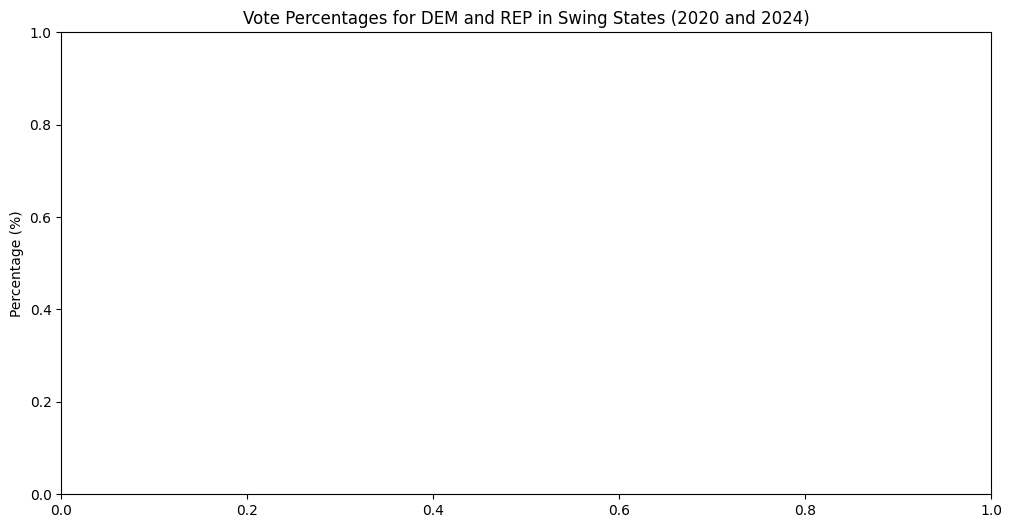

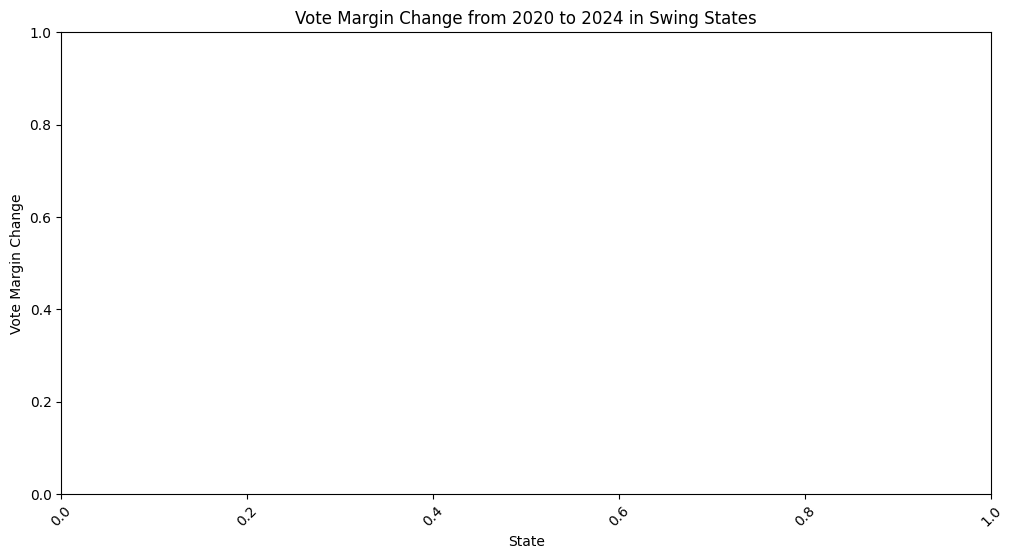

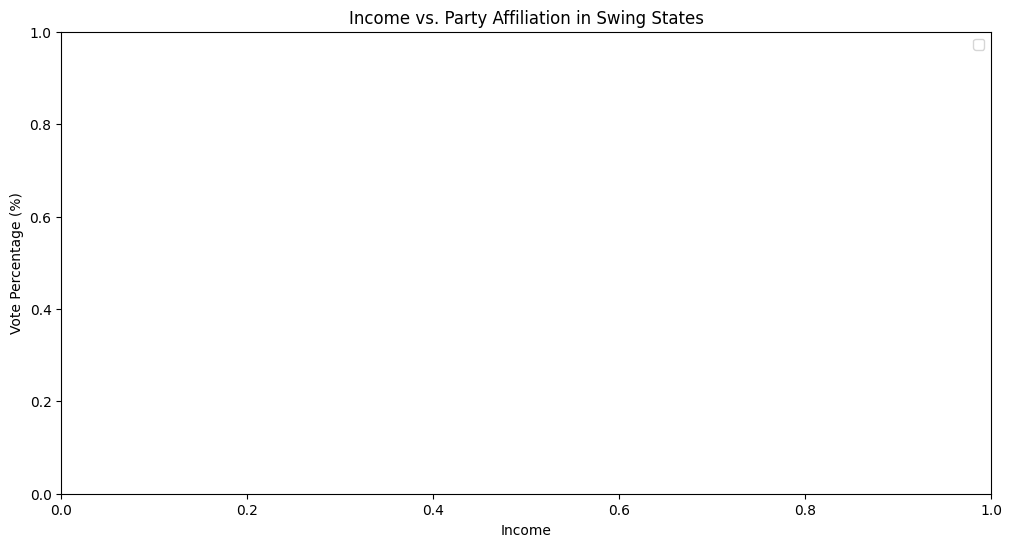

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



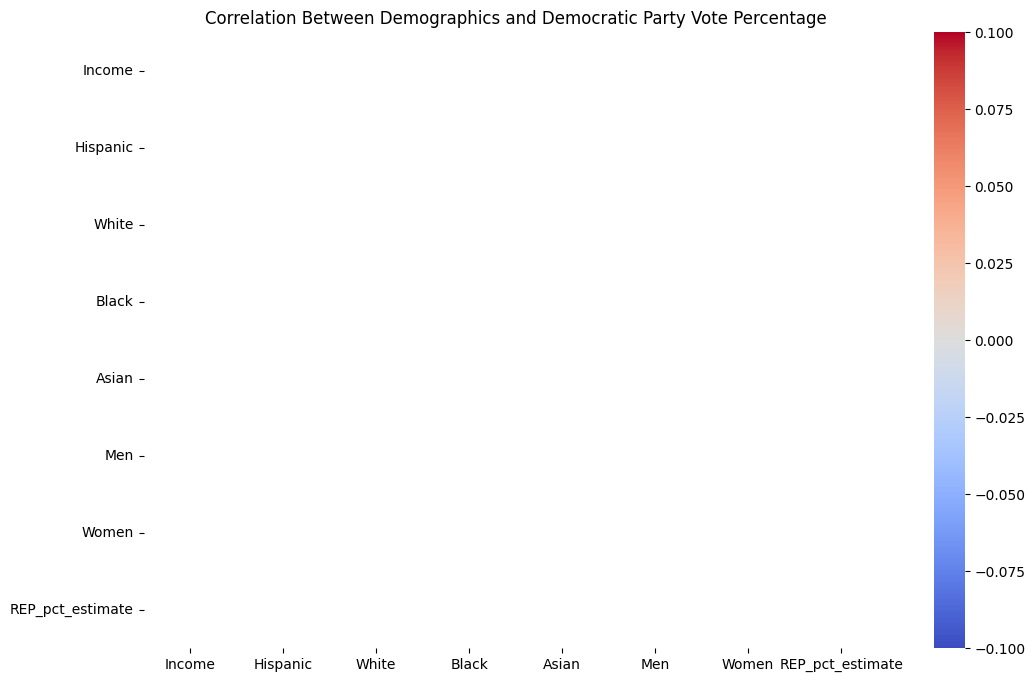

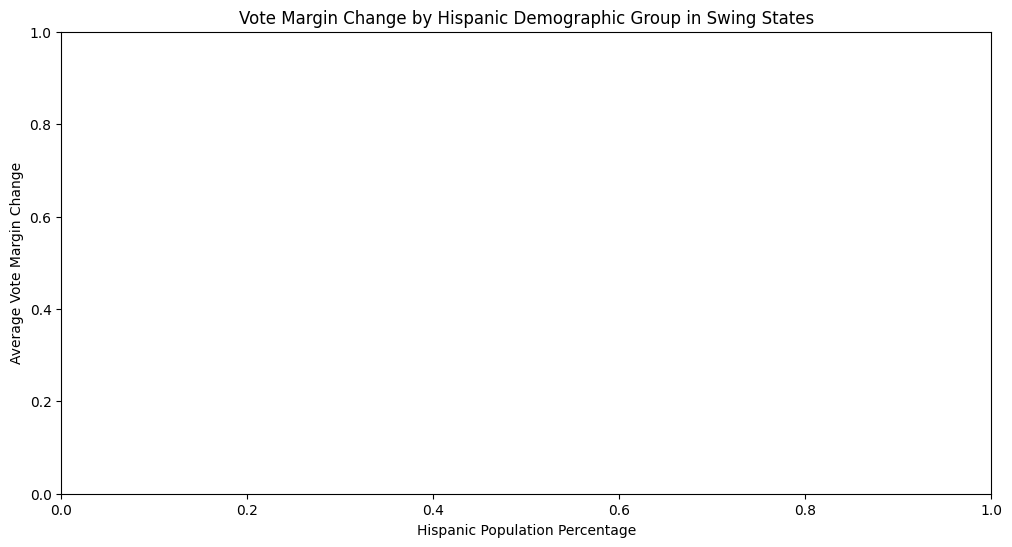

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your dataset with multi-level index ('state', 'county')

# List of known swing states (replace with your actual swing states list)
swing_states_list = ['Pennsylvania', 'Michigan', 'Wisconsin', 'Arizona', 'Nevada', 'North Carolina']

# Filter the dataset to include only the rows where the state (level 0) is in the swing states list
swing_states_df = df_final[df_final.index.get_level_values(0).isin(swing_states_list)]

# 1. Voting Behavior in Swing States
# Plot the voting percentages for 2020 and 2024 for DEM and REP parties
plt.figure(figsize=(12, 6))
sns.boxplot(data=swing_states_df[['DEM_pct_estimate', 'REP_pct_estimate']])
plt.title("Vote Percentages for DEM and REP in Swing States (2020 and 2024)")
plt.ylabel("Percentage (%)")
plt.show()

# 2. Vote Margin Change from 2020 to 2024 in Swing States
swing_states_df['vote_margin_change'] = swing_states_df['REP_pct_estimate'] - swing_states_df['DEM_pct_estimate']
plt.figure(figsize=(12, 6))
sns.boxplot(x=swing_states_df.index.get_level_values(0), y=swing_states_df['vote_margin_change'])
plt.title("Vote Margin Change from 2020 to 2024 in Swing States")
plt.xlabel("State")
plt.ylabel("Vote Margin Change")
plt.xticks(rotation=45)
plt.show()

# 3. Demographic Breakdown: Income and Party Affiliation
# Income vs. Party Affiliation in Swing States (Democratic and Republican)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=swing_states_df['Income'], y=swing_states_df['DEM_pct_estimate'], color='blue', label='DEM')
sns.scatterplot(x=swing_states_df['Income'], y=swing_states_df['REP_pct_estimate'], color='red', label='REP')
plt.title("Income vs. Party Affiliation in Swing States")
plt.xlabel("Income")
plt.ylabel("Vote Percentage (%)")
plt.legend()
plt.show()

# 4. Correlation of Demographics and Party Affiliation
# Checking correlation between demographic factors and vote percentage for DEM party
dem_corr = swing_states_df[['Income', 'Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women', 'REP_pct_estimate']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(dem_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Demographics and Democratic Party Vote Percentage")
plt.show()

# 5. Analyze Vote Margin Change by Demographic Group
# Grouping by demographic categories and analyzing the average vote margin change
swing_states_demo = swing_states_df[['Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women', 'vote_margin_change']]
demo_vote_margin = swing_states_demo.groupby(['Hispanic', 'White', 'Black', 'Asian', 'Men', 'Women']).mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hispanic', y='vote_margin_change', data=demo_vote_margin)
plt.title("Vote Margin Change by Hispanic Demographic Group in Swing States")
plt.xlabel("Hispanic Population Percentage")
plt.ylabel("Average Vote Margin Change")
plt.show()
